#Problem Monty’ego Halla

Problem Monty’ego Halla to klasyczny problem z teorii prawdopodobieństwa. Gracz staje przed trzema drzwiami. Za jednymi z nich znajduje się nagroda, a za pozostałymi nic. Aby wygrać, musi wybrać właściwe drzwi.

Po dokonaniu wyboru przez gracza, prowadzący otwiera jedne z dwóch pozostałych drzwi, zawsze wskazując drzwi bez nagrody. Następnie gracz ma możliwość zmiany swojego pierwotnego wyboru na drugie, jeszcze nieotwarte drzwi.

Intuicyjnie może się wydawać, że obie strategie mają równe szanse, ale w rzeczywistości:
- pozostanie przy wyborze wygrywa ~1/3 razy,
- zmiana wyboru wygrywa ~2/3 razy.

Cel notatnika:
- Przeprowadzić dużą liczbę symulacji (np. 10 000),
- Porównać empiryczne prawdopodobieństwa wygranej dla obu strategii,
- Zobaczyć, że warto zmieniać drzwi.

---


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Liczba symulacji
n_simulations = 10000

In [16]:
#symulacja pojedynczej gry
def monty_hall_game(change_choice=True):
    doors = [0, 1, 2]
    prize_door = np.random.choice(doors)
    player_choice = np.random.choice(doors)

    # wybieramy ktore drzwi wylaczymy z gry
    remaining_doors = [door for door in doors if door != player_choice and door != prize_door]
    monty_opens = np.random.choice(remaining_doors)

    # Gracz może zmienić wybór na pozostałe drzwi
    if change_choice:
        final_choice = [door for door in doors if door != player_choice and door != monty_opens][0]
    else:
        final_choice = player_choice

    return final_choice == prize_door


In [17]:
#symulowanie wielu gier
def simulate_games(n, change_choice):
    wins = 0
    for _ in range(n):
        if monty_hall_game(change_choice):
            wins += 1
    return wins / n  # empiryczne prawdopodobieństwo wygranej


In [18]:
#symulujemy i porównujemy dwie strategie

stay_win_rate = simulate_games(n_simulations, change_choice=False)
switch_win_rate = simulate_games(n_simulations, change_choice=True)

print(f"Prawdopodobieństwo wygranej przy pozostaniu przy wyborze: {stay_win_rate:.4f}")
print(f"Prawdopodobieństwo wygranej przy zmianie drzwi: {switch_win_rate:.4f}")


Prawdopodobieństwo wygranej przy pozostaniu przy wyborze: 0.3345
Prawdopodobieństwo wygranej przy zmianie drzwi: 0.6770


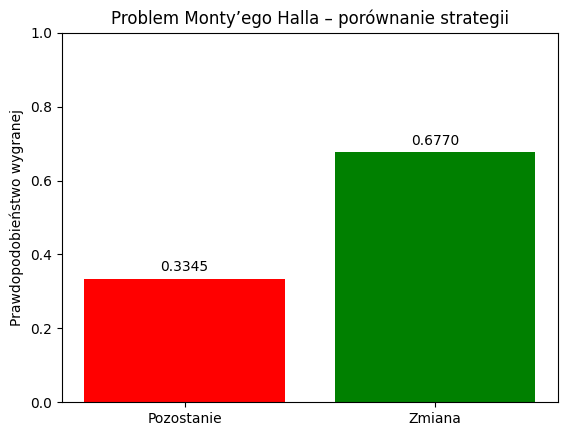

In [19]:
#porównanie wyników w formie wykresu słupkowego

strategies = ['Pozostanie', 'Zmiana']
probabilities = [stay_win_rate, switch_win_rate]

plt.bar(strategies, probabilities, color=['red', 'green'])
plt.ylim(0, 1)
plt.title('Problem Monty’ego Halla – porównanie strategii')
plt.ylabel('Prawdopodobieństwo wygranej')
plt.text(0, probabilities[0] + 0.02, f'{probabilities[0]:.4f}', ha='center')
plt.text(1, probabilities[1] + 0.02, f'{probabilities[1]:.4f}', ha='center')
plt.show()